## **Reading the Dataset**

We're reading the folders and splitting them into **train and test set** for training purposes.

In [ ]:
#EXPEERIMENT

In [2]:
!pip install mtcnn


     |████████████████████████████████| 2.3 MB 6.7 MB/s eta 0:00:01


In [59]:
# import os
# import cv2
# import numpy as np
# from mtcnn import MTCNN

# # Load the MTCNN face detection model
# mtcnn_detector = MTCNN()

# # Path to the folders containing face images
# input_folder = '/kaggle/input/face-recognition-dataset/Extracted Faces/Extracted Faces'
# output_folder = '/kaggle/working/sunglasses_image'

# # Ensure the output folder exists
# os.makedirs(output_folder, exist_ok=True)

# # Loop through all subfolders in the input folder
# for root, dirs, files in os.walk(input_folder):
#     for filename in files:
#         if filename.lower().endswith('.jpg'):
#             # Build the paths for input and output images
#             input_path = os.path.join(root, filename)
#             output_path = os.path.join(output_folder, os.path.relpath(input_path, input_folder))

#             # Load the goggle image with transparency (PNG format)
#             goggle_image = cv2.imread('/kaggle/input/goggle1/Lovepik_com-401380107-summer-sunglasses-artificial-sunglasses.png', cv2.IMREAD_UNCHANGED)

#             # Load the input face image
#             face_image = cv2.imread(input_path)

#             # Detect faces and eyes using MTCNN
#             faces = mtcnn_detector.detect_faces(face_image)
#             for face in faces:
#                 x, y, w, h = face['box']
#                 keypoints = face['keypoints']

#                 # Extract eye positions
#                 left_eye_x, left_eye_y = keypoints['left_eye']
#                 right_eye_x, right_eye_y = keypoints['right_eye']

#                 # Calculate goggle size based on eye positions
#                 goggle_width = int(np.sqrt((right_eye_x - left_eye_x)**2 + (right_eye_y - left_eye_y)**2) * 2)

#                 # Calculate goggle height based on the goggle width and original aspect ratio
#                 goggle_height = int(goggle_width * goggle_image.shape[0] / goggle_image.shape[1])

#                 # Resize the goggle image to fit the eyes
#                 resized_goggle = cv2.resize(goggle_image, (goggle_width, goggle_height))

#                 # Calculate goggle position based on eye positions
#                 goggle_x = left_eye_x - goggle_width // 3
#                 goggle_y = left_eye_y - goggle_height // 2

#                 # Overlay the goggle on the face
#                 for i in range(goggle_height):
#                     for j in range(goggle_width):
#                         if resized_goggle[i, j, 3] != 0:  # Check for transparency
#                             face_image[goggle_y + i, goggle_x + j, :] = resized_goggle[i, j, :3]

#             # Save the result to the output folder
#             os.makedirs(os.path.dirname(output_path), exist_ok=True)
#             cv2.imwrite(output_path, face_image)


In [60]:
# import shutil

# output_folder_path = '/kaggle/working/sunglasses_image'  # Adjust the path to your folder
# output_zip_path = '/kaggle/working/output_folder.zip'  # Desired path for the zip file

# shutil.make_archive(output_zip_path, 'zip', output_folder_path)

'/kaggle/working/output_folder.zip.zip'

In [1]:
import os
import cv2

# Path to the main directory containing people's folders
main_directory = "../input/face-recognition-dataset/Extracted Faces/Extracted Faces"
output_directory = "/kaggle/working/masked_imagesx"

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Function to apply a surgical mask to a face
def apply_mask(image):
    # Load the surgical mask image
    mask = cv2.imread("/kaggle/input/maskitis/5eaedd9743c27a0004fbf6ae.png", cv2.IMREAD_UNCHANGED)

    # Resize the mask to match the image size (128x128)
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Calculate the region of interest (ROI) for the lower part of the face
    roi_height = int(image.shape[0] * 0.5)  # Adjust the fraction as needed
    roi = image[-roi_height:, :]

    # Resize the mask to match the ROI size
    mask_roi = cv2.resize(mask, (roi.shape[1], roi.shape[0]))

    # Combine the mask and the ROI using bitwise operations
    for c in range(0, 3):
        roi[:, :, c] = roi[:, :, c] * (1 - mask_roi[:, :, 3] / 255.0) + mask_roi[:, :, c] * (mask_roi[:, :, 3] / 255.0)

    # Replace the lower part of the original image with the modified ROI
    image[-roi_height:, :] = roi

    return image





# Traverse through each person's folder
for person_folder in os.listdir(main_directory):
    person_folder_path = os.path.join(main_directory, person_folder)

    # Check if the item in the directory is a folder
    if os.path.isdir(person_folder_path):
        # Create a folder for the person in the output directory
        person_output_folder = os.path.join(output_directory, person_folder)
        os.makedirs(person_output_folder, exist_ok=True)

        # Traverse through each image in the person's folder
        for image_name in os.listdir(person_folder_path):
            image_path = os.path.join(person_folder_path, image_name)

            # Check if the item in the folder is a file and ends with '.jpg'
            if os.path.isfile(image_path) and image_name.endswith('.jpg'):
                # Apply the mask to the image
                image = cv2.imread(image_path)
                masked_image = apply_mask(image)

                # Create the output image path
                output_image_name = image_name
                output_image_path = os.path.join(person_output_folder, output_image_name)

                # Save the masked image
                cv2.imwrite(output_image_path, masked_image)

print("Masking completed.")


Masking completed.


In [ ]:
# import os
# import cv2
# import numpy as np
# from keras.preprocessing.image import img_to_array
# SIZE = 128
# extracted_dir = "/kaggle/input/face-recognition-dataset/Extracted Faces/Extracted Faces"
# masked_dir = "/kaggle/working/masked_imagesx"

# img_array = []
# mask_array = []

# for folder_name in os.listdir(extracted_dir):
#     extracted_folder_path = os.path.join(extracted_dir, folder_name)
#     masked_folder_path = os.path.join(masked_dir, folder_name)

#     if os.path.isdir(extracted_folder_path) and os.path.isdir(masked_folder_path):
#         for image_name in os.listdir(extracted_folder_path):
#             extracted_image_path = os.path.join(extracted_folder_path, image_name)
#             masked_image_path = os.path.join(masked_folder_path, image_name)

#             if os.path.isfile(extracted_image_path) and os.path.isfile(masked_image_path):
#                 extracted_image = cv2.imread(extracted_image_path)
#                 extracted_image = cv2.cvtColor(extracted_image, cv2.COLOR_BGR2RGB)
#                 extracted_image = cv2.resize(extracted_image, (SIZE, SIZE))
#                 extracted_image = extracted_image.astype('float32') / 255.0
                
#                 masked_image = cv2.imread(masked_image_path)
#                 masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
#                 masked_image = cv2.resize(masked_image, (SIZE, SIZE))
#                 masked_image = masked_image.astype('float32') / 255.0

#                 if extracted_image is not None and masked_image is not None:
#                     img_array.append(img_to_array(extracted_image))
#                     mask_array.append(img_to_array(masked_image))


In [7]:
import os
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array

SIZE = 128
extracted_dir = "/kaggle/input/face-recognition-dataset/Extracted Faces/Extracted Faces"
masked_dir = "/kaggle/working/masked_imagesx"

img_array = []
mask_array = []

# Set the limit for the number of images
limit = 3000
count = 0

for folder_name in os.listdir(extracted_dir):
    extracted_folder_path = os.path.join(extracted_dir, folder_name)
    masked_folder_path = os.path.join(masked_dir, folder_name)

    if os.path.isdir(extracted_folder_path) and os.path.isdir(masked_folder_path):
        for image_name in os.listdir(extracted_folder_path):
            if count >= limit:
                break  # Stop when the limit is reached

            extracted_image_path = os.path.join(extracted_folder_path, image_name)
            masked_image_path = os.path.join(masked_folder_path, image_name)

            if os.path.isfile(extracted_image_path) and os.path.isfile(masked_image_path):
                extracted_image = cv2.imread(extracted_image_path)
                extracted_image = cv2.cvtColor(extracted_image, cv2.COLOR_BGR2RGB)
                extracted_image = cv2.resize(extracted_image, (SIZE, SIZE))
                extracted_image = extracted_image.astype('float32') / 255.0

                masked_image = cv2.imread(masked_image_path)
                masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
                masked_image = cv2.resize(masked_image, (SIZE, SIZE))
                masked_image = masked_image.astype('float32') / 255.0

                if extracted_image is not None and masked_image is not None:
                    img_array.append(img_to_array(extracted_image))
                    mask_array.append(img_to_array(masked_image))

                count += 1

print(f"Total {count} images processed.")


Total 3000 images processed.


In [8]:
import os
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array

SIZE = 128
extracted_dir = "/kaggle/input/face-recognition-dataset/Extracted Faces/Extracted Faces"
masked_dir = "/kaggle/input/sunglasses1"



# Set the limit for the number of images
limit = 3000
count = 0

for folder_name in os.listdir(extracted_dir):
    extracted_folder_path = os.path.join(extracted_dir, folder_name)
    masked_folder_path = os.path.join(masked_dir, folder_name)

    if os.path.isdir(extracted_folder_path) and os.path.isdir(masked_folder_path):
        for image_name in os.listdir(extracted_folder_path):
            if count >= limit:
                break  # Stop when the limit is reached

            extracted_image_path = os.path.join(extracted_folder_path, image_name)
            masked_image_path = os.path.join(masked_folder_path, image_name)

            if os.path.isfile(extracted_image_path) and os.path.isfile(masked_image_path):
                extracted_image = cv2.imread(extracted_image_path)
                extracted_image = cv2.cvtColor(extracted_image, cv2.COLOR_BGR2RGB)
                extracted_image = cv2.resize(extracted_image, (SIZE, SIZE))
                extracted_image = extracted_image.astype('float32') / 255.0

                masked_image = cv2.imread(masked_image_path)
                masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
                masked_image = cv2.resize(masked_image, (SIZE, SIZE))
                masked_image = masked_image.astype('float32') / 255.0

                if extracted_image is not None and masked_image is not None:
                    img_array.append(img_to_array(extracted_image))
                    mask_array.append(img_to_array(masked_image))

                count += 1

print(f"Total {count} images processed.")

Total 3000 images processed.


In [4]:
len(mask_array)

6000

In [9]:
train_mask_image = mask_array[:2000]
train_image = img_array[:2000]
test_mask_image = mask_array[2000:3000]  # Get indices 4000 to 6106
test_image = img_array[2000:3000]  # Get indices 4000 to 6106
remaining_train_mask_image = mask_array[3000:5000]  # Get indices 4000 to 6106
remaining_train_image = img_array[3000:5000] 
remaining_test_mask_image = mask_array[5000:]  # Get indices from 10107 to the end
remaining_test_image = img_array[5000:]  # Get indices from 10107 to the end

test_mask_image = np.concatenate((test_mask_image, remaining_test_mask_image), axis=0)
test_image = np.concatenate((test_image, remaining_test_image), axis=0)

train_mask_image = np.concatenate((train_mask_image, remaining_train_mask_image), axis=0)
train_image = np.concatenate((train_image, remaining_train_image), axis=0)
# reshaping
train_mask_image = np.reshape(train_mask_image,(len(train_mask_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train no mask image shape:',train_image.shape)
test_mask_image = np.reshape(test_mask_image,(len(test_mask_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test no mask image shape',test_image.shape)

Train no mask image shape: (4000, 128, 128, 3)
Test no mask image shape (2000, 128, 128, 3)


In [16]:

def plot_image_pair(images = 5):
    for i in range(images):
        plt.figure(figsize = (7,7))
        plt.subplot(1,2,1)
        plt.title("No Mask", fontsize = 15)
        plt.imshow(img_array[i].reshape(SIZE, SIZE, 3))
        plt.subplot(1,2,2)
        plt.title("Mask", fontsize = 15)
        plt.imshow(mask_array[i].reshape(SIZE, SIZE, 3))
        
        
        
# plot_image_pair()

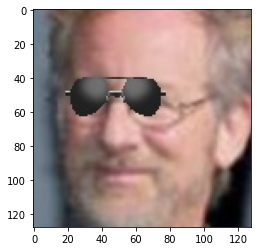

In [11]:
plt.imshow(test_mask_image[1999])

In [6]:
# import tensorflow as tf
# import keras 
# from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
# from keras.preprocessing.image import img_to_array
# import matplotlib.pyplot as plt
# import cv2
# from tqdm import tqdm 
# import numpy as np
# import os
# import re

# encoder_input = keras.Input(shape=(SIZE,SIZE, 3), name="img")
# x = Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_input)
# x = MaxPool2D(pool_size = (2,2))(x)
# x = Conv2D(filters = 32,kernel_size = (3,3),strides = (2,2), padding = 'valid')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), activation = 'relu', padding = 'same')(x)
# x = MaxPool2D(pool_size = (2,2))(x)
# x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 128, kernel_size = (3,3), padding = 'same')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 128 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
# x = Conv2D(filters = 256 , kernel_size = (3,3), padding = 'same')(x) 
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# encoder_output = Conv2D(filters = 512 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
# encoder = tf.keras.Model(encoder_input, encoder_output)



# decoder_input = Conv2D(filters = 512 ,kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_output)
# x = UpSampling2D(size = (2,2))(decoder_input)
# x = Conv2D(filters = 256, kernel_size = (3,3),  padding = 'same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = Conv2D(filters = 128, kernel_size = (3,3),  padding = 'same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 164, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = UpSampling2D(size = (2,2) )(x)

# x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = UpSampling2D(size = (2,2) )(x)
# x = Conv2D(filters = 32 , kernel_size = (3,3),  padding = 'same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = UpSampling2D(size = (2,2) )(x) 
# x = Conv2D(filters = 16  , kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# decoder_output = Conv2D(filters = 3, kernel_size = (3,3), padding = 'same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.LeakyReLU()(x)

# # final model
# model = keras.Model(encoder_input, decoder_output)
# model.summary()

import keras
from matplotlib import pyplot as plt
from keras.layers import Input,Conv2D,MaxPooling2D,Conv2DTranspose
from keras.models import Model
from keras.optimizers import Adam
from keras.layers.merge import concatenate
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(SIZE, SIZE, 3))

%matplotlib inline
##unet architecture

def conv2d(input_img,n_filters,size=(3,3),batchnorm=True):
    conv=Conv2D(filters=n_filters,kernel_size=size,kernel_initializer='he_normal',padding='same')(input_img)
    if batchnorm:
        conv=keras.layers.BatchNormalization()(conv)
    conv=keras.layers.Activation('relu')(conv)
    
    conv=Conv2D(filters=n_filters,kernel_size=size,kernel_initializer='he_normal',padding='same')(input_img)
    if batchnorm:
        conv=keras.layers.BatchNormalization()(conv)
    conv=keras.layers.Activation('relu')(conv)
    return conv


def unet_autoencoder(input_img,n_filters=16,dropout=0.1,batchnorm=True):
    #Encoder
    conv1=conv2d(input_img,n_filters*1,size=(3,3),batchnorm=batchnorm)
    pool1=MaxPooling2D((2,2))(conv1)
    pool1=keras.layers.Dropout(dropout)(pool1)
    
    conv2=conv2d(pool1,n_filters*2,size=(3,3),batchnorm=batchnorm)
    pool2=MaxPooling2D((2,2))(conv2)
    pool2=keras.layers.Dropout(dropout)(pool2)
    
    conv3=conv2d(pool2,n_filters*4,size=(3,3),batchnorm=batchnorm)
    pool3=MaxPooling2D((2,2))(conv3)
    pool3=keras.layers.Dropout(dropout)(pool3)
    
    conv4=conv2d(pool3,n_filters*8,size=(3,3),batchnorm=batchnorm)
    print(conv4.shape)
    pool4=MaxPooling2D((2,2))(conv4)
    pool4=keras.layers.Dropout(dropout)(pool4)
    
    conv5=conv2d(pool4,n_filters*16,size=(3,3),batchnorm=batchnorm)
    
    #Decoder
    up6=Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(conv5)
    print(up6.shape)
    up6=concatenate([up6,conv4])
    up6=keras.layers.Dropout(dropout)(up6)
    conv6=conv2d(up6,n_filters*8,size=(3,3),batchnorm=batchnorm)
    
    up7=Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(conv6)
    up7=concatenate([up7,conv3])
    up7=keras.layers.Dropout(dropout)(up7)
    conv7=conv2d(up7,n_filters*4,size=(3,3),batchnorm=batchnorm)
    
    up8=Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(conv7)
    up8=concatenate([up8,conv2])
    up8=keras.layers.Dropout(dropout)(up8)
    conv8=conv2d(up8,n_filters*2,size=(3,3),batchnorm=batchnorm)
    
    up9=Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(conv8)
    up9=concatenate([up9,conv1])
    up9=keras.layers.Dropout(dropout)(up9)
    conv9=conv2d(up9,n_filters*1,size=(3,3),batchnorm=batchnorm)
    output = Conv2D(filters = 3, kernel_size = (3,3), padding = 'same')(conv9)

    
#     output=Conv2D(1,(1,1),activation='sigmoid')(conv9)
    model=Model(input_img,output)
    return model
    
input_img = Input(shape = (128, 128, 3))   
autoencoder=unet_autoencoder(input_img,n_filters=16,dropout=0.1,batchnorm=True)
autoencoder.compile(loss='mean_squared_error',optimizer=Adam(learning_rate = 0.001),metrics = ['acc'])
autoencoder.summary()

58892288/58889256 [==============================] - 0s 0us/step
(None, 16, 16, 128)
(None, 16, 16, 128)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 16) 0           batch_normalization_1[0

Epoch 1/100
125/125 [==============================] - 14s 62ms/step - loss: 0.3002 - acc: 0.4189 - val_loss: 0.0236 - val_acc: 0.8364
Epoch 2/100
125/125 [==============================] - 6s 50ms/step - loss: 0.0188 - acc: 0.8082 - val_loss: 0.0230 - val_acc: 0.8825
Epoch 3/100
125/125 [==============================] - 6s 51ms/step - loss: 0.0112 - acc: 0.8445 - val_loss: 0.0156 - val_acc: 0.8821
Epoch 4/100
125/125 [==============================] - 6s 50ms/step - loss: 0.0085 - acc: 0.8681 - val_loss: 0.0067 - val_acc: 0.8965
Epoch 5/100
125/125 [==============================] - 6s 50ms/step - loss: 0.0072 - acc: 0.8789 - val_loss: 0.0051 - val_acc: 0.8975
Epoch 6/100
125/125 [==============================] - 6s 50ms/step - loss: 0.0064 - acc: 0.8869 - val_loss: 0.0046 - val_acc: 0.8887
Epoch 7/100
125/125 [==============================] - 6s 50ms/step - loss: 0.0059 - acc: 0.8882 - val_loss: 0.0043 - val_acc: 0.9147
Epoch 8/100
125/125 [==============================] - 6s 52m

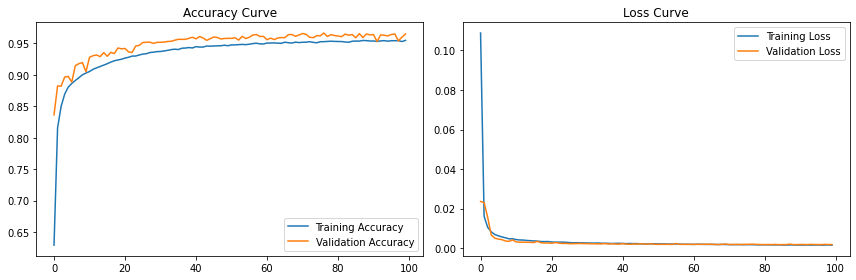

In [7]:
# model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
#               metrics = ['acc'])

# model.fit(train_mask_image, train_image, epochs = 100, verbose = 1)

train_autoencoder = autoencoder.fit(train_mask_image, train_image,batch_size=32,epochs=100, verbose=1, validation_data=(test_mask_image, test_image))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_autoencoder.history['acc'], label='Training Accuracy')
plt.plot(train_autoencoder.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_autoencoder.history['loss'], label='Training Loss')
plt.plot(train_autoencoder.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.tight_layout()
plt.show()


In [9]:
loss_acc= autoencoder.evaluate(test_mask_image, test_image)
print("Loss: ",loss_acc[0])
print('Accuracy: ', np.round(loss_acc[1],2) * 100)

63/63 [==============================] - 1s 16ms/step - loss: 0.0018 - acc: 0.9651
Loss:  0.0017887073336169124
Accuracy:  97.0


In [13]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Predict images using the trained model
predicted_images = autoencoder.predict(test_mask_image)

# Calculate PSNR and SSIM
psnr_scores = []
ssim_scores = []

for i in range(len(predicted_images)):
    psnr = peak_signal_noise_ratio(test_image[i], predicted_images[i])
    ssim = structural_similarity(test_image[i], predicted_images[i], multichannel=True)
    psnr_scores.append(psnr)
    ssim_scores.append(ssim)

average_psnr = np.mean(psnr_scores)
average_ssim = np.mean(ssim_scores)

print("PSNR score for both :", average_psnr)
print("SSIM score for both:", average_ssim)

PSNR score for both : 28.976237657217375
SSIM score for both: 0.9326175831100947


In [5]:
def plot_images(start = 0, end = 5):
    for i in range(start, end, 1):
        plt.figure(figsize = (10,10))
        plt.subplot(1,3,1)
        plt.title("No Mask", fontsize = 12)
        plt.imshow(test_image[i])
        plt.subplot(1,3,2)
        plt.title("Mask", fontsize = 12)
        plt.imshow(test_mask_image[i])
        plt.subplot(1,3,3)
        plt.title("Predicted", fontsize = 12)
        prediction = autoencoder.predict(test_mask_image[i].reshape(1,SIZE, SIZE, 3)).reshape(SIZE, SIZE, 3)
        plt.imshow(prediction)
        plt.show()
        

In [16]:
from tensorflow.keras.models import load_model

autoencoder_model_path = '/kaggle/input/autoencoder-128-/autoencoder_model(128_on_different).h5'
autoencoder = load_model(autoencoder_model_path)

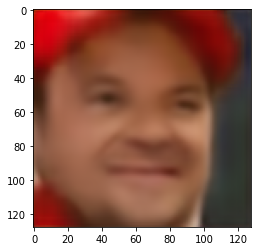

In [17]:
prediction = autoencoder.predict(test_mask_image[10].reshape(1,SIZE, SIZE, 3)).reshape(SIZE, SIZE, 3)
plt.imshow(prediction)

In [14]:
autoencoder.save('unet_autoencoder_model(128_both).h5')

In [ ]:
#ONLY FOR SUNGLASSES

In [1]:
import os
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array
SIZE = 128
extracted_dir = "/kaggle/input/face-recognition-dataset/Extracted Faces/Extracted Faces"
masked_dir = "/kaggle/input/sunglasses1"

img_array = []
sunglasses_array = []

for folder_name in os.listdir(extracted_dir):
    extracted_folder_path = os.path.join(extracted_dir, folder_name)
    sunglasses_folder_path = os.path.join(masked_dir, folder_name)

    if os.path.isdir(extracted_folder_path) and os.path.isdir(sunglasses_folder_path):
        for image_name in os.listdir(extracted_folder_path):
            extracted_image_path = os.path.join(extracted_folder_path, image_name)
            sunglasses_image_path = os.path.join(sunglasses_folder_path, image_name)

            if os.path.isfile(extracted_image_path) and os.path.isfile(sunglasses_image_path):
                extracted_image = cv2.imread(extracted_image_path)
                extracted_image = cv2.cvtColor(extracted_image, cv2.COLOR_BGR2RGB)
                extracted_image = cv2.resize(extracted_image, (SIZE, SIZE))
                extracted_image = extracted_image.astype('float32') / 255.0
                
                sunglasses_image = cv2.imread(sunglasses_image_path)
                sunglasses_image = cv2.cvtColor(sunglasses_image, cv2.COLOR_BGR2RGB)
                sunglasses_image = cv2.resize(sunglasses_image, (SIZE, SIZE))
                sunglasses_image = sunglasses_image.astype('float32') / 255.0

                if extracted_image is not None and sunglasses_image is not None:
                    img_array.append(img_to_array(extracted_image))
                    sunglasses_array.append(img_to_array(sunglasses_image))


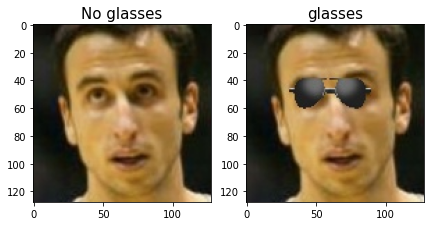

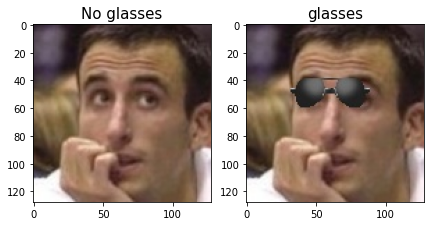

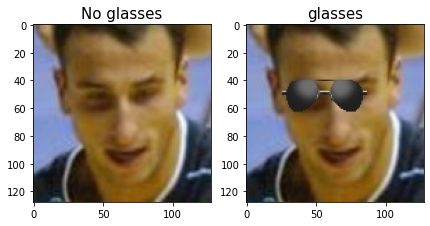

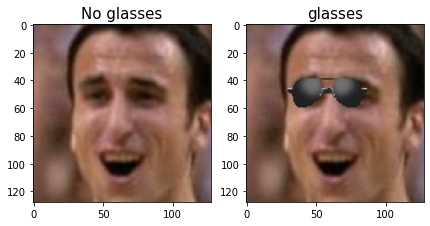

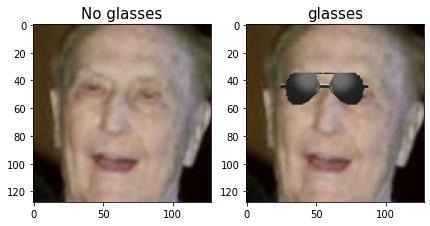

In [4]:
def plot_image_pair(images = 5):
    for i in range(images):
        plt.figure(figsize = (7,7))
        plt.subplot(1,2,1)
        plt.title("No glasses", fontsize = 15)
        plt.imshow(img_array[i].reshape(SIZE, SIZE, 3))
        plt.subplot(1,2,2)
        plt.title("glasses", fontsize = 15)
        plt.imshow(sunglasses_array[i].reshape(SIZE, SIZE, 3))
        
        
        
plot_image_pair(5)

In [2]:
train_sun_image = sunglasses_array[:4000]
train_image = img_array[:4000]
test_sun_image = sunglasses_array[4000:]
test_image = img_array[4000:]
# reshaping
train_sun_image = np.reshape(train_sun_image,(len(train_sun_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train no mask image shape:',train_image.shape)
test_sun_image = np.reshape(test_sun_image,(len(test_sun_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test no mask image shape',test_image.shape)

Train no mask image shape: (4000, 128, 128, 3)
Test no mask image shape (2107, 128, 128, 3)


In [4]:
# import tensorflow as tf
# import keras 
# from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
# from keras.preprocessing.image import img_to_array
# import matplotlib.pyplot as plt
# import cv2
# from tqdm import tqdm 
# import numpy as np
# import os
# import re

# encoder_input = keras.Input(shape=(SIZE,SIZE, 3), name="img")
# x = Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_input)
# x = MaxPool2D(pool_size = (2,2))(x)
# x = Conv2D(filters = 32,kernel_size = (3,3),strides = (2,2), padding = 'valid')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), activation = 'relu', padding = 'same')(x)
# x = MaxPool2D(pool_size = (2,2))(x)
# x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 128, kernel_size = (3,3), padding = 'same')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 128 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
# x = Conv2D(filters = 256 , kernel_size = (3,3), padding = 'same')(x) 
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# encoder_output = Conv2D(filters = 512 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
# encoder = tf.keras.Model(encoder_input, encoder_output)



# decoder_input = Conv2D(filters = 512 ,kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_output)
# x = UpSampling2D(size = (2,2))(decoder_input)
# x = Conv2D(filters = 256, kernel_size = (3,3),  padding = 'same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = Conv2D(filters = 128, kernel_size = (3,3),  padding = 'same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 164, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = UpSampling2D(size = (2,2) )(x)

# x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = UpSampling2D(size = (2,2) )(x)
# x = Conv2D(filters = 32 , kernel_size = (3,3),  padding = 'same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = UpSampling2D(size = (2,2) )(x) 
# x = Conv2D(filters = 16  , kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# decoder_output = Conv2D(filters = 3, kernel_size = (3,3), padding = 'same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.LeakyReLU()(x)

# # final model
# model = keras.Model(encoder_input, decoder_output)
# model.summary()

# import tensorflow as tf
# import keras 
# from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
# from keras.preprocessing.image import img_to_array
# import matplotlib.pyplot as plt
# import cv2
# from tqdm import tqdm 
# import numpy as np
# import os
# import re

# encoder_input = keras.Input(shape=(SIZE,SIZE, 3), name="img")
# x = Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_input)
# x = MaxPool2D(pool_size = (2,2))(x)
# x = Conv2D(filters = 32,kernel_size = (3,3),strides = (2,2), padding = 'valid')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), activation = 'relu', padding = 'same')(x)
# x = MaxPool2D(pool_size = (2,2))(x)
# x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 128, kernel_size = (3,3), padding = 'same')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 128 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
# x = Conv2D(filters = 256 , kernel_size = (3,3), padding = 'same')(x) 
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# encoder_output = Conv2D(filters = 512 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
# encoder = tf.keras.Model(encoder_input, encoder_output)



# decoder_input = Conv2D(filters = 512 ,kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_output)
# x = UpSampling2D(size = (2,2))(decoder_input)
# x = Conv2D(filters = 256, kernel_size = (3,3),  padding = 'same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = Conv2D(filters = 128, kernel_size = (3,3),  padding = 'same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Conv2D(filters = 164, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = UpSampling2D(size = (2,2) )(x)

# x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# x = UpSampling2D(size = (2,2) )(x)
# x = Conv2D(filters = 32 , kernel_size = (3,3),  padding = 'same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = UpSampling2D(size = (2,2) )(x) 
# x = Conv2D(filters = 16  , kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
# decoder_output = Conv2D(filters = 3, kernel_size = (3,3), padding = 'same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.LeakyReLU()(x)

# # final model
# model = keras.Model(encoder_input, decoder_output)
# model.summary()

import keras
from matplotlib import pyplot as plt
from keras.layers import Input,Conv2D,MaxPooling2D,Conv2DTranspose
from keras.models import Model
from keras.optimizers import Adam
from keras.layers.merge import concatenate
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(SIZE, SIZE, 3))

%matplotlib inline
##unet architecture

def conv2d(input_img,n_filters,size=(3,3),batchnorm=True):
    conv=Conv2D(filters=n_filters,kernel_size=size,kernel_initializer='he_normal',padding='same')(input_img)
    if batchnorm:
        conv=keras.layers.BatchNormalization()(conv)
    conv=keras.layers.Activation('relu')(conv)
    return conv


def unet_autoencoder(input_img,n_filters=16,dropout=0.1,batchnorm=True):
    #Encoder
    conv1=conv2d(input_img,n_filters*1,size=(3,3),batchnorm=batchnorm)
    pool1=MaxPooling2D((2,2))(conv1)
    pool1=keras.layers.Dropout(dropout)(pool1)
    
    conv2=conv2d(pool1,n_filters*2,size=(3,3),batchnorm=batchnorm)
    pool2=MaxPooling2D((2,2))(conv2)
    pool2=keras.layers.Dropout(dropout)(pool2)
    
    conv3=conv2d(pool2,n_filters*4,size=(3,3),batchnorm=batchnorm)
    pool3=MaxPooling2D((2,2))(conv3)
    pool3=keras.layers.Dropout(dropout)(pool3)
    
    conv4=conv2d(pool3,n_filters*8,size=(3,3),batchnorm=batchnorm)
    print(conv4.shape)
    pool4=MaxPooling2D((2,2))(conv4)
    pool4=keras.layers.Dropout(dropout)(pool4)
    
    conv5=conv2d(pool4,n_filters*16,size=(3,3),batchnorm=batchnorm)
    
    #Decoder
    up6=Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(conv5)
    print(up6.shape)
    up6=concatenate([up6,conv4])
    up6=keras.layers.Dropout(dropout)(up6)
    conv6=conv2d(up6,n_filters*8,size=(3,3),batchnorm=batchnorm)
    
    up7=Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(conv6)
    up7=concatenate([up7,conv3])
    up7=keras.layers.Dropout(dropout)(up7)
    conv7=conv2d(up7,n_filters*4,size=(3,3),batchnorm=batchnorm)
    
    up8=Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(conv7)
    up8=concatenate([up8,conv2])
    up8=keras.layers.Dropout(dropout)(up8)
    conv8=conv2d(up8,n_filters*2,size=(3,3),batchnorm=batchnorm)
    
    up9=Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(conv8)
    up9=concatenate([up9,conv1])
    up9=keras.layers.Dropout(dropout)(up9)
    conv9=conv2d(up9,n_filters*1,size=(3,3),batchnorm=batchnorm)
    output = Conv2D(filters = 3, kernel_size = (3,3), padding = 'same')(conv9)

    
#     output=Conv2D(1,(1,1),activation='sigmoid')(conv9)
    model=Model(input_img,output)
    return model
    
input_img = Input(shape = (128, 128, 3))   
autoencoder=unet_autoencoder(input_img,n_filters=16,dropout=0.1,batchnorm=True)
autoencoder.compile(loss='mean_squared_error',optimizer=Adam(learning_rate = 0.001),metrics = ['acc'])
autoencoder.summary()

(None, 16, 16, 128)
(None, 16, 16, 128)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 128, 128, 16) 448         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 128, 128, 16) 64          conv2d_20[0][0]                  
__________________________________________________________________________________________________
activation_19 (Activation)      (None, 128, 128, 16) 0           batch_normalization_19[0][0]     
____________________________________________________

In [29]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

NameError: name 'tf' is not defined

Epoch 1/100
125/125 [==============================] - 14s 64ms/step - loss: 0.2286 - acc: 0.5255 - val_loss: 0.0198 - val_acc: 0.7246
Epoch 2/100
125/125 [==============================] - 6s 51ms/step - loss: 0.0136 - acc: 0.8132 - val_loss: 0.0063 - val_acc: 0.8608
Epoch 3/100
125/125 [==============================] - 6s 51ms/step - loss: 0.0088 - acc: 0.8465 - val_loss: 0.0044 - val_acc: 0.8965
Epoch 4/100
125/125 [==============================] - 6s 52ms/step - loss: 0.0068 - acc: 0.8695 - val_loss: 0.0055 - val_acc: 0.8728
Epoch 5/100
125/125 [==============================] - 7s 52ms/step - loss: 0.0057 - acc: 0.8775 - val_loss: 0.0031 - val_acc: 0.9112
Epoch 6/100
125/125 [==============================] - 6s 51ms/step - loss: 0.0047 - acc: 0.8900 - val_loss: 0.0026 - val_acc: 0.9178
Epoch 7/100
125/125 [==============================] - 6s 51ms/step - loss: 0.0041 - acc: 0.8981 - val_loss: 0.0024 - val_acc: 0.9196
Epoch 8/100
125/125 [==============================] - 6s 51m

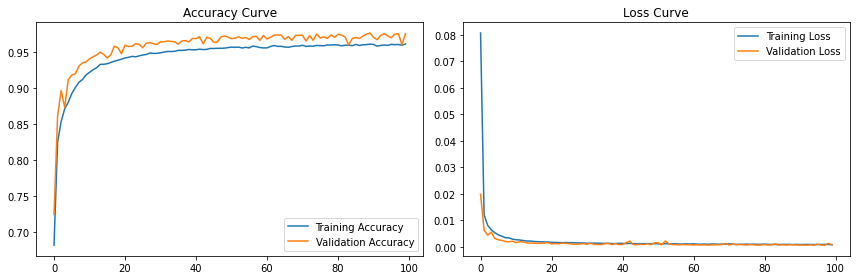

In [5]:

train_autoencoder = autoencoder.fit(train_sun_image, train_image,batch_size=32,epochs=100, verbose=1, validation_data=(test_sun_image, test_image))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_autoencoder.history['acc'], label='Training Accuracy')
plt.plot(train_autoencoder.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_autoencoder.history['loss'], label='Training Loss')
plt.plot(train_autoencoder.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.tight_layout()
plt.show()

In [7]:
loss_acc= autoencoder.evaluate(test_sun_image, test_image)
print("Loss: ",loss_acc[0])
print('Accuracy: ', np.round(loss_acc[1],2) * 100)

66/66 [==============================] - 1s 17ms/step - loss: 6.3846e-04 - acc: 0.9753
Loss:  0.0006384610896930099
Accuracy:  98.0


In [12]:
model.save('unet_autoencoder_model(128_on_diff_sun).h5')

In [16]:
def plot_images(start = 0, end = 5):
    for i in range(start, end, 1):
        plt.figure(figsize = (10,10))
        plt.subplot(1,3,1)
        plt.title("No glasses", fontsize = 12)
        plt.imshow(test_image[i])
        plt.subplot(1,3,2)
        plt.title("glasses", fontsize = 12)
        plt.imshow(test_sun_image[i])
        plt.subplot(1,3,3)
        plt.title("Predicted", fontsize = 12)
        prediction = autoencoder.predict(test_sun_image[i].reshape(1,SIZE, SIZE, 3)).reshape(SIZE, SIZE, 3)
        plt.imshow(prediction)
        plt.show()
        

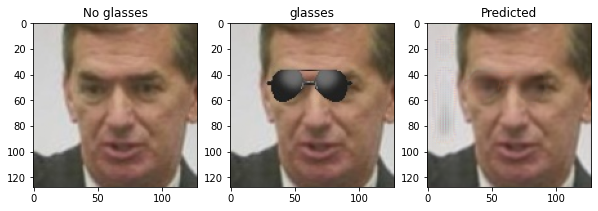

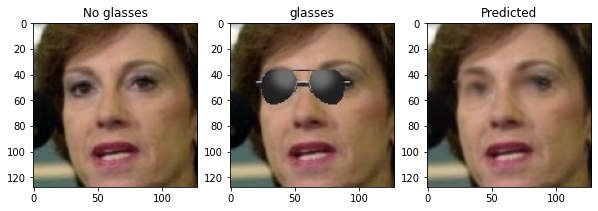

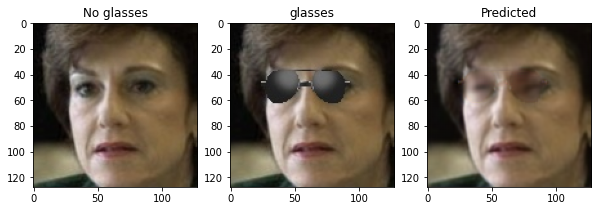

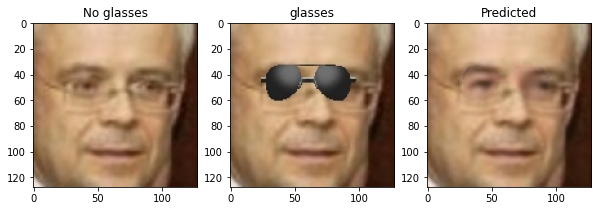

In [18]:
plot_images(1,5)

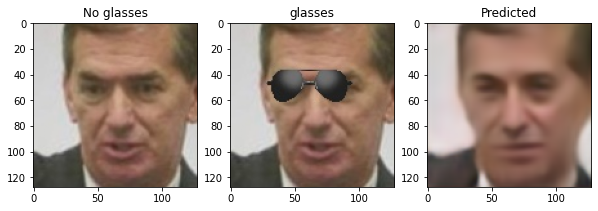

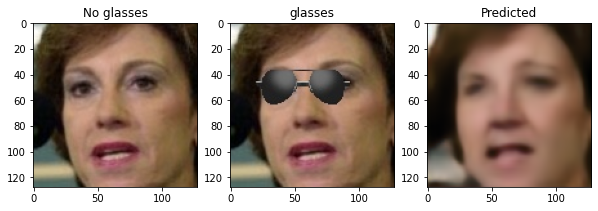

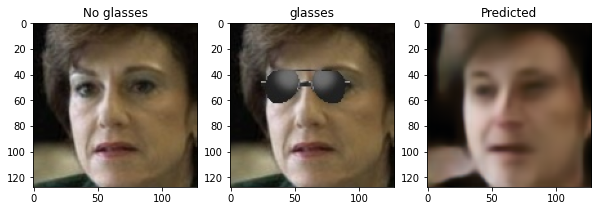

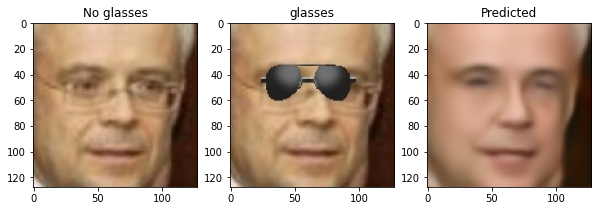

In [17]:
plot_images(1,5)

In [20]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Predict images using the trained model
predicted_images = autoencoder.predict(test_sun_image)

# Calculate PSNR and SSIM
psnr_scores = []
ssim_scores = []

for i in range(len(predicted_images)):
    psnr = peak_signal_noise_ratio(test_image[i], predicted_images[i])
    ssim = structural_similarity(test_image[i], predicted_images[i], multichannel=True)
    psnr_scores.append(psnr)
    ssim_scores.append(ssim)

average_psnr = np.mean(psnr_scores)
average_ssim = np.mean(ssim_scores)

print("PSNR for sunglass:", average_psnr)
print("SSIM for sunglass:", average_ssim)

PSNR for sunglass: 32.445027501373325
SSIM for sunglass: 0.9689792995571247


In [19]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Predict images using the trained model
predicted_images = model.predict(test_sun_image)

# Calculate PSNR and SSIM
psnr_scores = []
ssim_scores = []

for i in range(len(predicted_images)):
    psnr = peak_signal_noise_ratio(test_image[i], predicted_images[i])
    ssim = structural_similarity(test_image[i], predicted_images[i], multichannel=True)
    psnr_scores.append(psnr)
    ssim_scores.append(ssim)

average_psnr = np.mean(psnr_scores)
average_ssim = np.mean(ssim_scores)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)

Average PSNR: 24.03866979463004
Average SSIM: 0.8082075116360782


In [22]:
import time

# Predict images using the trained model and measure time
start_time = time.time()
predicted_images = model.predict(test_sun_image)
end_time = time.time()

inference_time = end_time - start_time
print("Total Inference Time:", inference_time, "seconds")

Total Inference Time: 9.608680486679077 seconds


In [ ]:
#EXPERIMENT END

In [ ]:
## for mask ony

In [9]:
import os
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array
SIZE = 128
extracted_dir = "/kaggle/input/face-recognition-dataset/Extracted Faces/Extracted Faces"
masked_dir = "/kaggle/working/masked_imagesx"

img_array = []
mask_array = []

for folder_name in os.listdir(extracted_dir):
    extracted_folder_path = os.path.join(extracted_dir, folder_name)
    masked_folder_path = os.path.join(masked_dir, folder_name)

    if os.path.isdir(extracted_folder_path) and os.path.isdir(masked_folder_path):
        for image_name in os.listdir(extracted_folder_path):
            extracted_image_path = os.path.join(extracted_folder_path, image_name)
            masked_image_path = os.path.join(masked_folder_path, image_name)

            if os.path.isfile(extracted_image_path) and os.path.isfile(masked_image_path):
                extracted_image = cv2.imread(extracted_image_path)
                extracted_image = cv2.cvtColor(extracted_image, cv2.COLOR_BGR2RGB)
                extracted_image = cv2.resize(extracted_image, (SIZE, SIZE))
                extracted_image = extracted_image.astype('float32') / 255.0
                
                masked_image = cv2.imread(masked_image_path)
                masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
                masked_image = cv2.resize(masked_image, (SIZE, SIZE))
                masked_image = masked_image.astype('float32') / 255.0
                
                if extracted_image is not None and masked_image is not None:
                    img_array.append(img_to_array(extracted_image))
                    mask_array.append(img_to_array(masked_image))

In [12]:
train_mask_image = mask_array[:4000]
train_image = img_array[:4000]
test_mask_image = mask_array[4000:]
test_image = img_array[4000:]
# reshaping
train_mask_image = np.reshape(train_mask_image,(len(train_mask_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train no mask image shape:',train_image.shape)
test_mask_image = np.reshape(test_mask_image,(len(test_mask_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test no mask image shape',test_image.shape)

Train no mask image shape: (4000, 128, 128, 3)
Test no mask image shape (2107, 128, 128, 3)


In [13]:
import keras
from matplotlib import pyplot as plt
from keras.layers import Input,Conv2D,MaxPooling2D,Conv2DTranspose
from keras.models import Model
from keras.optimizers import Adam
from keras.layers.merge import concatenate
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(SIZE, SIZE, 3))

%matplotlib inline
##unet architecture

def conv2d(input_img,n_filters,size=(3,3),batchnorm=True):
    conv=Conv2D(filters=n_filters,kernel_size=size,kernel_initializer='he_normal',padding='same')(input_img)
    if batchnorm:
        conv=keras.layers.BatchNormalization()(conv)
    conv=keras.layers.Activation('relu')(conv)
    


def unet_autoencoder(input_img,n_filters=16,dropout=0.1,batchnorm=True):
    #Encoder
    conv1=conv2d(input_img,n_filters*1,size=(3,3),batchnorm=batchnorm)
    pool1=MaxPooling2D((2,2))(conv1)
    pool1=keras.layers.Dropout(dropout)(pool1)
    
    conv2=conv2d(pool1,n_filters*2,size=(3,3),batchnorm=batchnorm)
    pool2=MaxPooling2D((2,2))(conv2)
    pool2=keras.layers.Dropout(dropout)(pool2)
    
    conv3=conv2d(pool2,n_filters*4,size=(3,3),batchnorm=batchnorm)
    pool3=MaxPooling2D((2,2))(conv3)
    pool3=keras.layers.Dropout(dropout)(pool3)
    
    conv4=conv2d(pool3,n_filters*8,size=(3,3),batchnorm=batchnorm)
    print(conv4.shape)
    pool4=MaxPooling2D((2,2))(conv4)
    pool4=keras.layers.Dropout(dropout)(pool4)
    
    conv5=conv2d(pool4,n_filters*16,size=(3,3),batchnorm=batchnorm)
    
    #Decoder
    up6=Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(conv5)
    print(up6.shape)
    up6=concatenate([up6,conv4])
    up6=keras.layers.Dropout(dropout)(up6)
    conv6=conv2d(up6,n_filters*8,size=(3,3),batchnorm=batchnorm)
    
    up7=Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(conv6)
    up7=concatenate([up7,conv3])
    up7=keras.layers.Dropout(dropout)(up7)
    conv7=conv2d(up7,n_filters*4,size=(3,3),batchnorm=batchnorm)
    
    up8=Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(conv7)
    up8=concatenate([up8,conv2])
    up8=keras.layers.Dropout(dropout)(up8)
    conv8=conv2d(up8,n_filters*2,size=(3,3),batchnorm=batchnorm)
    
    up9=Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(conv8)
    up9=concatenate([up9,conv1])
    up9=keras.layers.Dropout(dropout)(up9)
    conv9=conv2d(up9,n_filters*1,size=(3,3),batchnorm=batchnorm)
    output = Conv2D(filters = 3, kernel_size = (3,3), padding = 'same')(conv9)

    
#     output=Conv2D(1,(1,1),activation='sigmoid')(conv9)
    model=Model(input_img,output)
    return model
    
input_img = Input(shape = (128, 128, 3))   
autoencoder=unet_autoencoder(input_img,n_filters=16,dropout=0.1,batchnorm=True)
autoencoder.compile(loss='mean_squared_error',optimizer=Adam(learning_rate = 0.001),metrics = ['acc'])
autoencoder.summary()

58892288/58889256 [==============================] - 0s 0us/step
(None, 16, 16, 128)
(None, 16, 16, 128)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 16) 0           batch_normalization_1[0

Epoch 1/100
125/125 [==============================] - 14s 60ms/step - loss: 0.2173 - acc: 0.5537 - val_loss: 0.0578 - val_acc: 0.6807
Epoch 2/100
125/125 [==============================] - 6s 50ms/step - loss: 0.0167 - acc: 0.7928 - val_loss: 0.0164 - val_acc: 0.8569
Epoch 3/100
125/125 [==============================] - 6s 51ms/step - loss: 0.0112 - acc: 0.8354 - val_loss: 0.0086 - val_acc: 0.8791
Epoch 4/100
125/125 [==============================] - 6s 51ms/step - loss: 0.0087 - acc: 0.8579 - val_loss: 0.0076 - val_acc: 0.8978
Epoch 5/100
125/125 [==============================] - 6s 50ms/step - loss: 0.0076 - acc: 0.8735 - val_loss: 0.0063 - val_acc: 0.8978
Epoch 6/100
125/125 [==============================] - 6s 51ms/step - loss: 0.0069 - acc: 0.8821 - val_loss: 0.0053 - val_acc: 0.9133
Epoch 7/100
125/125 [==============================] - 6s 50ms/step - loss: 0.0064 - acc: 0.8875 - val_loss: 0.0048 - val_acc: 0.9182
Epoch 8/100
125/125 [==============================] - 6s 51m

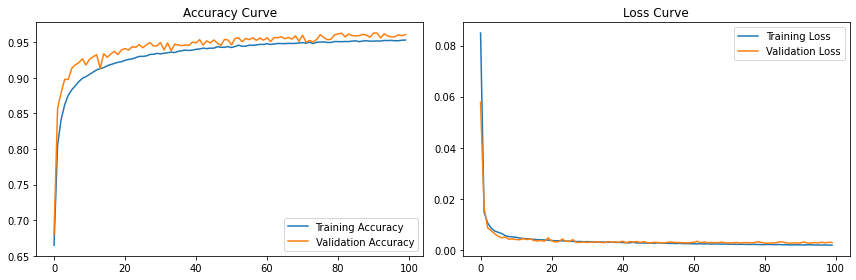

In [16]:
train_autoencoder = autoencoder.fit(train_mask_image, train_image,batch_size=32,epochs=100, verbose=1, validation_data=(test_mask_image, test_image))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_autoencoder.history['acc'], label='Training Accuracy')
plt.plot(train_autoencoder.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_autoencoder.history['loss'], label='Training Loss')
plt.plot(train_autoencoder.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.tight_layout()
plt.show()

In [17]:
loss_acc= autoencoder.evaluate(test_mask_image, test_image)
print("Loss: ",loss_acc[0])
print('Accuracy: ', np.round(loss_acc[1],2) * 100)

66/66 [==============================] - 1s 17ms/step - loss: 0.0029 - acc: 0.9608
Loss:  0.0029432226438075304
Accuracy:  96.0


In [19]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Predict images using the trained model
predicted_images = autoencoder.predict(test_mask_image)

# Calculate PSNR and SSIM
psnr_scores = []
ssim_scores = []

for i in range(len(predicted_images)):
    psnr = peak_signal_noise_ratio(test_image[i], predicted_images[i])
    ssim = structural_similarity(test_image[i], predicted_images[i], multichannel=True)
    psnr_scores.append(psnr)
    ssim_scores.append(ssim)

average_psnr = np.mean(psnr_scores)
average_ssim = np.mean(ssim_scores)

print("PSNR for mask:", average_psnr)
print("SSIM for mask:", average_ssim)

PSNR for mask: 25.792722002612425
SSIM for mask: 0.8995902406163316


In [ ]:
model.save('unet_autoencoder_model(128_on_diff_mask).h5')

In [27]:
def plot_images(start = 0, end = 5):
    for i in range(start, end, 1):
        plt.figure(figsize = (10,10))
        plt.subplot(1,3,1)
        plt.title("No mask", fontsize = 12)
        plt.imshow(test_image[i])
        plt.subplot(1,3,2)
        plt.title("mask", fontsize = 12)
        plt.imshow(test_mask_image[i])
        plt.subplot(1,3,3)
        plt.title("Predicted", fontsize = 12)
        prediction = autoencoder.predict(test_mask_image[i].reshape(1,SIZE, SIZE, 3)).reshape(SIZE, SIZE, 3)
        plt.imshow(prediction)
        plt.show()
        

In [3]:
import os
import cv2
import time
import random
import numpy as np

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import preprocess_input

import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__, np.__version__

('2.4.1', '1.19.5')

In [ ]:
#EXPERIMENT START

In [19]:
from tensorflow.keras.models import load_model

autoencoder_model_path = '/kaggle/input/autoencoder-128-/autoencoder_model(128_on_different).h5'
autoencoder = load_model(autoencoder_model_path)

In [2]:
import os
import cv2

# Path to the main directory containing people's folders
main_directory = "../input/face-recognition-dataset/Extracted Faces/Extracted Faces"
output_directory = "/kaggle/working/masked_imagesx"

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Function to apply a surgical mask to a face
def apply_mask(image):
    # Load the surgical mask image
    mask = cv2.imread("/kaggle/input/maskitis/5eaedd9743c27a0004fbf6ae.png", cv2.IMREAD_UNCHANGED)

    # Resize the mask to match the image size (128x128)
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Calculate the region of interest (ROI) for the lower part of the face
    roi_height = int(image.shape[0] * 0.5)  # Adjust the fraction as needed
    roi = image[-roi_height:, :]

    # Resize the mask to match the ROI size
    mask_roi = cv2.resize(mask, (roi.shape[1], roi.shape[0]))

    # Combine the mask and the ROI using bitwise operations
    for c in range(0, 3):
        roi[:, :, c] = roi[:, :, c] * (1 - mask_roi[:, :, 3] / 255.0) + mask_roi[:, :, c] * (mask_roi[:, :, 3] / 255.0)

    # Replace the lower part of the original image with the modified ROI
    image[-roi_height:, :] = roi

    return image





# Traverse through each person's folder
for person_folder in os.listdir(main_directory):
    person_folder_path = os.path.join(main_directory, person_folder)

    # Check if the item in the directory is a folder
    if os.path.isdir(person_folder_path):
        # Create a folder for the person in the output directory
        person_output_folder = os.path.join(output_directory, person_folder)
        os.makedirs(person_output_folder, exist_ok=True)

        # Traverse through each image in the person's folder
        for image_name in os.listdir(person_folder_path):
            image_path = os.path.join(person_folder_path, image_name)

            # Check if the item in the folder is a file and ends with '.jpg'
            if os.path.isfile(image_path) and image_name.endswith('.jpg'):
                # Apply the mask to the image
                image = cv2.imread(image_path)
                masked_image = apply_mask(image)

                # Create the output image path
                output_image_name = image_name
                output_image_path = os.path.join(person_output_folder, output_image_name)

                # Save the masked image
                cv2.imwrite(output_image_path, masked_image)

print("Masking completed.")


Masking completed.


In [5]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Define paths
masked_dir = "/kaggle/working/masked_imagesx"
predicted_dir = "/kaggle/working/predicted_images"  # Save predicted images in /kaggle/working/predicted_images
autoencoder_model_path = "/kaggle/input/autoencoder-128-/autoencoder_model(128_on_different).h5"  # Replace with actual model path
SIZE = 128  # Replace with the desired image size

# Load the autoencoder model
autoencoder = load_model(autoencoder_model_path)

# Function to process images and save predictions
def process_and_save_images(masked_image_path, predicted_image_path):
    # Load the masked image
    image = cv2.imread(masked_image_path)
    if image is None:
        return

    # Preprocess the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (SIZE, SIZE))
    image = image.astype('float32') / 255.0
    image = img_to_array(image)
    image = np.reshape(image, (1, SIZE, SIZE, 3))

    # Make prediction
    predicted_image = autoencoder.predict(image.reshape(1,SIZE,SIZE,3)).reshape(SIZE, SIZE, 3)
    predicted_image = (predicted_image * 255).astype(np.uint8)
#     predicted_image = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)
    # Save the predicted image in the corresponding path
    os.makedirs(os.path.dirname(predicted_image_path), exist_ok=True)
    plt.imsave(predicted_image_path, predicted_image)  # Use plt.imsave to save in RGB format

# Iterate through folders and images in the masked directory
for root, dirs, files in os.walk(masked_dir):
    for file in files:
        if file.lower().endswith(('.jpg')):
            # Get paths for masked and predicted images
            masked_image_path = os.path.join(root, file)
            relative_path = os.path.relpath(masked_image_path, masked_dir)
            predicted_image_path = os.path.join(predicted_dir, relative_path)

            # Process and save images
            process_and_save_images(masked_image_path, predicted_image_path)


In [ ]:
#EXPERIMENT END

In [6]:
# Setting random seeds to enable consistency while testing.
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)

ROOT = "../input/face-recognition-dataset/Extracted Faces/Extracted Faces"

def read_image(index):
    path = os.path.join(ROOT, index[0], index[1])
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image



In [7]:
def split_dataset(directory, split=0.9):
    folders = os.listdir(directory)
    num_train = int(len(folders)*split)
    
    random.shuffle(folders)
    
    train_list, test_list = {}, {}
    
    # Creating Train-list
    for folder in folders[:num_train]:
        num_files = len(os.listdir(os.path.join(directory, folder)))
        train_list[folder] = num_files
    
    # Creating Test-list
    for folder in folders[num_train:]:
        num_files = len(os.listdir(os.path.join(directory, folder)))
        test_list[folder] = num_files  
    
    return train_list, test_list

train_list, test_list = split_dataset(ROOT, split=0.9)
print("Length of training list:", len(train_list))
print("Length of testing list :", len(test_list))

# train_list, test list contains the folder names along with the number of files in the folder.
print("\nTest List:", test_list)

Length of training list: 1191
Length of testing list : 133

Test List: {'323': 2, '1': 2, '1479': 2, '1307': 4, '1588': 46, '1447': 4, '621': 7, '1074': 4, '649': 12, '1487': 4, '616': 13, '1045': 2, '1674': 2, '591': 11, '564': 2, '925': 2, '257': 3, '66': 3, '211': 4, '226': 7, '970': 2, '911': 3, '620': 4, '342': 2, '1531': 7, '1544': 2, '1486': 6, '389': 3, '460': 3, '435': 7, '155': 2, '858': 7, '1110': 3, '124': 2, '332': 2, '881': 3, '983': 2, '912': 3, '1184': 3, '586': 2, '985': 2, '959': 2, '803': 4, '1036': 2, '775': 2, '630': 2, '1506': 2, '707': 2, '1583': 2, '768': 3, '469': 4, '237': 3, '251': 7, '848': 2, '1527': 2, '1242': 2, '1256': 8, '418': 3, '1511': 2, '1002': 3, '532': 2, '268': 3, '741': 2, '824': 14, '234': 5, '197': 2, '1587': 3, '316': 4, '1370': 3, '184': 3, '205': 12, '940': 2, '492': 2, '625': 12, '294': 2, '1296': 2, '1147': 2, '361': 3, '311': 2, '631': 15, '32': 3, '1222': 2, '91': 3, '74': 7, '695': 3, '1189': 29, '1676': 9, '1677': 3, '876': 10, '747'

In [8]:
from keras.preprocessing.image import img_to_array
OCC_ROOT= "/kaggle/working/predicted_images"
# OCC_ROOT= "/kaggle/working/masked_imagesx"


def read_image_occ_exp(index):
    path = os.path.join(OCC_ROOT, index[0], index[1])
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [10]:
def create_triplets(directory, folder_list, max_files=10):
    triplets = []
    folders = list(folder_list.keys())
    
    for folder in folders:
        path = os.path.join(directory, folder)
        files = list(os.listdir(path))[:max_files]
        num_files = len(files)
        
        for i in range(num_files-1):
            for j in range(i+1, num_files):
                anchor = (folder, f"{i}.jpg")
                positive = (folder, f"{j}.jpg")

                neg_folder = folder
                while neg_folder == folder:
                    neg_folder = random.choice(folders)
                neg_file = random.randint(0, folder_list[neg_folder]-1)
                negative = (neg_folder, f"{neg_file}.jpg")

                triplets.append((anchor, positive, negative))
            
    random.shuffle(triplets)
    return triplets

In [ ]:
data_augmentation = keras.Sequential([
    tf.keras.layers.Rescaling(1./255), 
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomTranslation(0.05, 0.05),
    tf.keras.layers.RandomRotation(0.25),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomBrightness(0.5)
])

In [25]:
train_triplet = create_triplets(ROOT, train_list)
test_triplet  = create_triplets(ROOT, test_list)

print("Number of training triplets:", len(train_triplet))
print("Number of testing triplets :", len(test_triplet))

print("\nExamples of triplets:")
for i in range(5):
    print(train_triplet[i])

Number of training triplets: 9996
Number of testing triplets : 1235

Examples of triplets:
(('1308', '6.jpg'), ('1308', '7.jpg'), ('736', '0.jpg'))
(('422', '1.jpg'), ('422', '2.jpg'), ('1616', '12.jpg'))
(('1410', '3.jpg'), ('1410', '5.jpg'), ('1400', '1.jpg'))
(('1597', '3.jpg'), ('1597', '4.jpg'), ('495', '1.jpg'))
(('1580', '3.jpg'), ('1580', '4.jpg'), ('1072', '0.jpg'))


In [26]:
def get_batch(triplet_list, batch_size=256, preprocess=True):
    batch_steps = len(triplet_list)//batch_size
    
    for i in range(batch_steps+1):
        anchor   = []
        positive = []
        negative = []
        
        j = i*batch_size
        while j<(i+1)*batch_size and j<len(triplet_list):
            a, p, n = triplet_list[j]
#             anchor.append(read_image_occ_exp(a))
            anchor.append(read_image_occ_exp(a))

            positive.append(read_image(p))
            negative.append(read_image(n))
            j+=1
            
        anchor = np.array(anchor)
        positive = np.array(positive)
        negative = np.array(negative)
        
        if preprocess:
            anchor = preprocess_input(anchor)
            positive = preprocess_input(positive)
            negative = preprocess_input(negative)
        
        yield ([anchor, positive, negative])

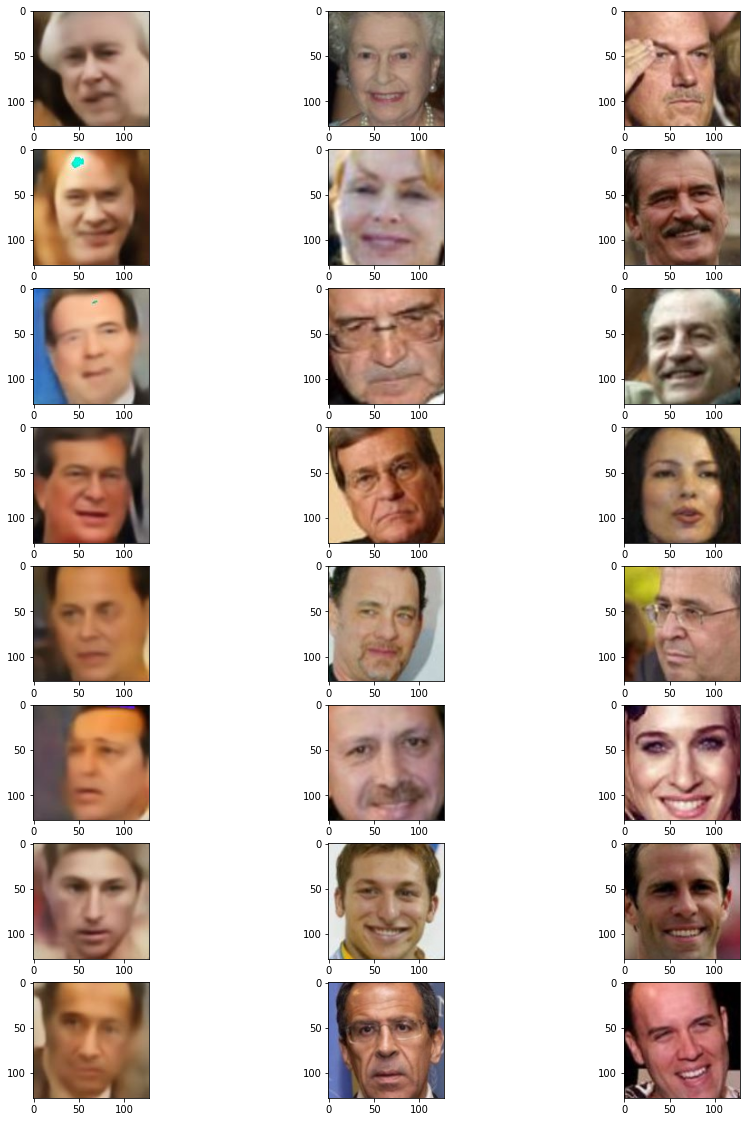

In [29]:
num_plots = 8

f, axes = plt.subplots(num_plots, 3, figsize=(15, 20))

for x in get_batch(train_triplet, batch_size=num_plots, preprocess=False):
    a,p,n = x
    for i in range(num_plots):
        axes[i, 0].imshow(a[i])
        axes[i, 1].imshow(p[i])
        axes[i, 2].imshow(n[i])
        i+=1
    break

In [ ]:
# EXPERIMENT START

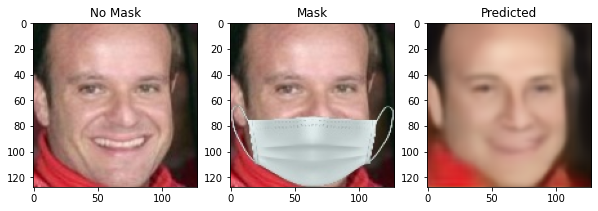

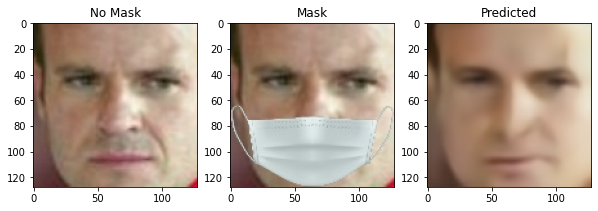

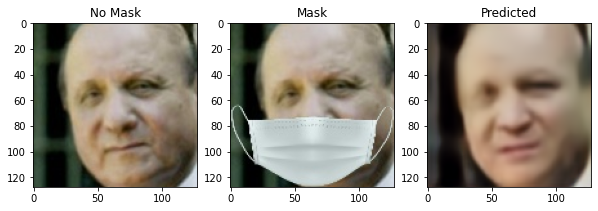

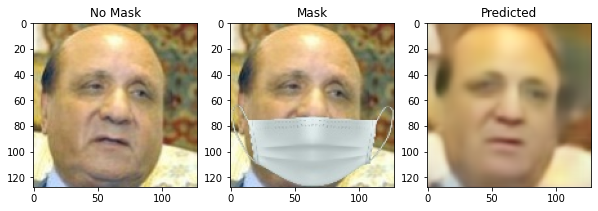

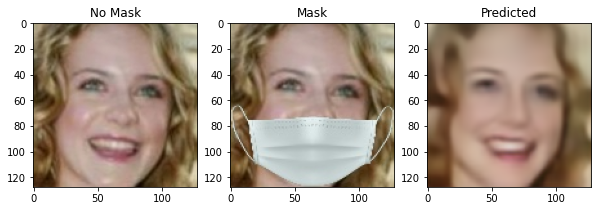

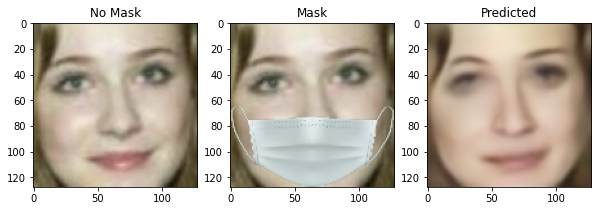

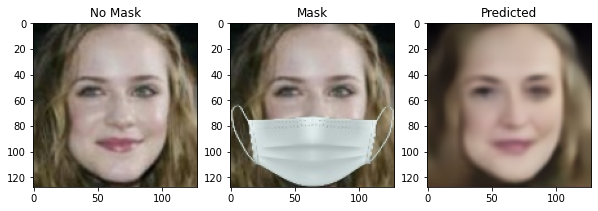

In [30]:
def plot_images(start = 0, end = 5):
    for i in range(start, end, 1):
        plt.figure(figsize = (10,10))
        plt.subplot(1,3,1)
        plt.title("No Mask", fontsize = 12)
        plt.imshow(test_image[i])
        plt.subplot(1,3,2)
        plt.title("Mask", fontsize = 12)
        plt.imshow(test_mask_image[i])
        plt.subplot(1,3,3)
        plt.title("Predicted", fontsize = 12)
        prediction = autoencoder.predict(test_mask_image[i].reshape(1,SIZE, SIZE, 3)).reshape(SIZE, SIZE, 3)
        plt.imshow(prediction)
        plt.show()
   
plot_images(11,18)

In [ ]:
#EXPERIMENT END


In [11]:
from tensorflow.keras import backend, layers, metrics

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
#EXPERIMENT START


In [ ]:
# EXPERIMENT END

In [27]:
def get_occ_encoder(input_shape):
    """ Returns the image encoding model """

    # Load the pretrained autoencoder model
    autoencoder_model_path = '/kaggle/input/autoencoder-128-/autoencoder_model(128_on_different).h5'
    autoencoder = load_model(autoencoder_model_path)
    
    autoencoder_input_shape = (128, 128, 3)  # Use the input size of Xception

    # Set the input shape of the autoencoder model to match the resized shape
    autoencoder._layers[0].batch_input_shape = (None,) + autoencoder_input_shape
    
    # Freeze the layers of the autoencoder
    for layer in autoencoder.layers:
        layer.trainable = False

    pretrained_model = Xception(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False,
        pooling='avg',
    )

    # Create the encoder model using the Sequential API
    occ_encode_model = Sequential([
        autoencoder,                    # Add the pretrained autoencoder model
        
        pretrained_model,               # Add the Xception model
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))
    ], name="Occ_Encode_model")
    
    return occ_encode_model

In [70]:
def get_encoder(input_shape):
    """ Returns the image encoding model """

    pretrained_model = Xception(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False,
        pooling='avg',
    )
    
    for i in range(len(pretrained_model.layers)-27):
        pretrained_model.layers[i].trainable = False

    encode_model = Sequential([
        pretrained_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))
    ], name="Encode_Model")
    return encode_model

In [71]:
class DistanceLayer(layers.Layer):
    # A layer to compute ‖f(A) - f(P)‖² and ‖f(A) - f(N)‖²
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)
    

def get_siamese_network(input_shape = (128, 128, 3)):
    encoder = get_encoder(input_shape)
    occ_encoder = get_occ_encoder(input_shape)
    
    # Input Layers for the images
    anchor_input   = layers.Input(input_shape, name="Anchor_Input")
    positive_input = layers.Input(input_shape, name="Positive_Input")
    negative_input = layers.Input(input_shape, name="Negative_Input")
    
    ## Generate the encodings (feature vectors) for the images
    encoded_a = encoder(anchor_input)
    encoded_p = encoder(positive_input)
    encoded_n = encoder(negative_input)
    
    # A layer to compute ‖f(A) - f(P)‖² and ‖f(A) - f(N)‖²
    distances = DistanceLayer()(
        encoder(anchor_input),
        encoder(positive_input),
        encoder(negative_input)
    )
    
    # Creating the Model
    siamese_network = Model(
        inputs  = [anchor_input, positive_input, negative_input],
        outputs = distances,
        name = "Siamese_Network"
    )
    return siamese_network

siamese_network = get_siamese_network()
siamese_network.summary()

Model: "Siamese_Network"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Anchor_Input (InputLayer)       [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Positive_Input (InputLayer)     [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Negative_Input (InputLayer)     [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Encode_Model (Sequential)       (None, 256)          22043944    Anchor_Input[0][0]               
                                                                 Positive_Input[0][0

In [ ]:
plot_model(siamese_network, show_shapes=True, show_layer_names=True)

In [73]:
class SiameseModel(Model):
    # Builds a Siamese model based on a base-model
    def __init__(self, siamese_network, margin=1.0):
        super(SiameseModel, self).__init__()
        
        self.margin = margin
        self.siamese_network = siamese_network
        self.loss_tracker = metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape get the gradients when we compute loss, and uses them to update the weights
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)
            
        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.siamese_network.trainable_weights))
        
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self._compute_loss(data)
        
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def _compute_loss(self, data):
        # Get the two distances from the network, then compute the triplet loss
        ap_distance, an_distance = self.siamese_network(data)
        loss = tf.maximum(ap_distance - an_distance + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics so the reset_states() can be called automatically.
        return [self.loss_tracker]

In [74]:
siamese_model = SiameseModel(siamese_network)

optimizer = Adam(learning_rate=1e-3, epsilon=1e-01)
siamese_model.compile(optimizer=optimizer)

In [75]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
def test_on_triplets(batch_size = 256):
    pos_scores, neg_scores = [], []
    pos_labels, neg_labels = [], []
    
    for data in get_batch(test_triplet, batch_size=batch_size):
        prediction = siamese_model.predict(data)
        pos_scores.extend(prediction[0])
        neg_scores.extend(prediction[1])
        
    
    
    accuracy = np.sum(np.array(pos_scores) < np.array(neg_scores)) / len(pos_scores)
    ap_mean = np.mean(pos_scores)
    an_mean = np.mean(neg_scores)
    ap_stds = np.std(pos_scores)
    an_stds = np.std(neg_scores)
    t = np.mean(pos_scores + neg_scores)
#     f1 = f1_score(pos_scores, predicted_labels)
    
    print(f"Accuracy = {accuracy:.5f}")
    return (accuracy, ap_mean, an_mean, ap_stds, an_stds,t,pos_scores, neg_scores)

In [71]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
def print_metrics(true_labels, predicted_labels, prefix=""):
    f1 = f1_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"{prefix}F1 Score: {f1:.4f}")
    print(f"{prefix}Precision: {precision:.4f}")
    print(f"{prefix}Recall: {recall:.4f}")
    print(f"{prefix}Accuracy: {accuracy:.4f}")


In [77]:
save_all = False
epochs = 50
batch_size = 32

max_acc = 0
train_loss = []
test_metrics = []

for epoch in range(1, epochs+1):
    t = time.time()
    
    # Training the model on train data
    epoch_loss = []
    for data in get_batch(train_triplet, batch_size=batch_size):
        loss = siamese_model.train_on_batch(data)
        epoch_loss.append(loss)
    epoch_loss = sum(epoch_loss)/len(epoch_loss)
    train_loss.append(epoch_loss)

    print(f"\nEPOCH: {epoch} \t (Epoch done in {int(time.time()-t)} sec)")
    print(f"Loss on train    = {epoch_loss:.5f}")
    
    # Testing the model on test data
    metric = test_on_triplets(batch_size=batch_size)
    test_metrics.append(metric)
    accuracy = metric[0]
    
    # Saving the model weights
    if save_all or accuracy>=max_acc:
        siamese_model.save_weights("siamese_model")
        max_acc = accuracy

# Saving the model after all epochs run
siamese_model.save_weights("siamese_model-final")

siamese_model.save("sm.h5")  


EPOCH: 1 	 (Epoch done in 82 sec)
Loss on train    = 0.18726
Accuracy = 0.83887

EPOCH: 2 	 (Epoch done in 80 sec)
Loss on train    = 0.15319
Accuracy = 0.86154

EPOCH: 3 	 (Epoch done in 81 sec)
Loss on train    = 0.11801
Accuracy = 0.85263

EPOCH: 4 	 (Epoch done in 79 sec)
Loss on train    = 0.09539
Accuracy = 0.84939

EPOCH: 5 	 (Epoch done in 79 sec)
Loss on train    = 0.07615
Accuracy = 0.86883

EPOCH: 6 	 (Epoch done in 78 sec)
Loss on train    = 0.05781
Accuracy = 0.85911

EPOCH: 7 	 (Epoch done in 78 sec)
Loss on train    = 0.05126
Accuracy = 0.86478

EPOCH: 8 	 (Epoch done in 79 sec)
Loss on train    = 0.04150
Accuracy = 0.86640

EPOCH: 9 	 (Epoch done in 80 sec)
Loss on train    = 0.03515
Accuracy = 0.85425

EPOCH: 10 	 (Epoch done in 80 sec)
Loss on train    = 0.03034
Accuracy = 0.87287

EPOCH: 11 	 (Epoch done in 79 sec)
Loss on train    = 0.02647
Accuracy = 0.87449

EPOCH: 12 	 (Epoch done in 79 sec)
Loss on train    = 0.02031
Accuracy = 0.86559

EPOCH: 13 	 (Epoch done 

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

## **Evaluating the Model**


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


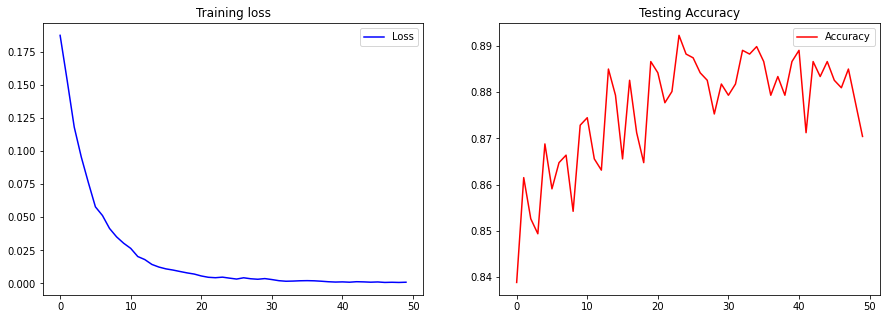

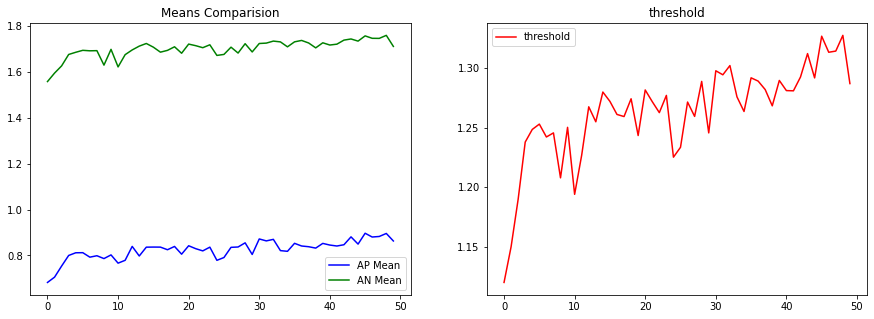

In [78]:
def plot_metrics(loss, metrics):
    # Extracting individual metrics from metrics
    accuracy = metrics[:, 0]
    ap_mean  = metrics[:, 1]
    an_mean  = metrics[:, 2]
    ap_stds  = metrics[:, 3]
    an_stds  = metrics[:, 4]
    t = metrics[:,5]
    
    plt.figure(figsize=(15,5))
    
    # Plotting the loss over epochs
    plt.subplot(121)
    plt.plot(loss, 'b', label='Loss')
    plt.title('Training loss')
    plt.legend()
    
    # Plotting the accuracy over epochs
    plt.subplot(122)
    plt.plot(accuracy, 'r', label='Accuracy')
    plt.title('Testing Accuracy')
    plt.legend()
    
    plt.figure(figsize=(15,5))
    
    # Comparing the Means over epochs
    plt.subplot(121)
    plt.plot(ap_mean, 'b', label='AP Mean')
    plt.plot(an_mean, 'g', label='AN Mean')
    plt.title('Means Comparision')
    plt.legend()
    
    # Plotting the accuracy
    ap_75quartile = (ap_mean+ap_stds)
    an_75quartile = (an_mean-an_stds)
    plt.subplot(122)
    plt.plot(t, 'r', label='threshold')
    plt.title('threshold')
#     plt.plot(ap_75quartile, 'b', label='AP (Mean+SD)')
#     plt.plot(an_75quartile, 'g', label='AN (Mean-SD)')
#     plt.title('75th Quartile Comparision')

    plt.legend()

test_metrics = np.array(test_metrics)
plot_metrics(train_loss, test_metrics)

In [74]:
def plot_ROC(loss, metrics):
    # ... (Rest of the code)
    
    # Plotting the ROC curve over epochs
    plt.figure(figsize=(15, 5))
    for i, metric in enumerate(metrics):
        fpr, tpr, _ = roc_curve(np.concatenate([np.ones_like(np.array(metric[1])),
                                                np.zeros_like(np.array(metric[2]))]),
                                np.concatenate([np.array(metric[1]), np.array(metric[2])]))
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Epoch {i+1} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

test_metrics = np.array(test_metrics)
plot_ROC(train_loss, test_metrics)

ValueError: zero-dimensional arrays cannot be concatenated

<Figure size 1080x360 with 0 Axes>

## **Using the Model**


In [79]:
def extract_encoder(model):
    encoder = get_encoder((128, 128, 3))
    i=0
    for e_layer in model.layers[0].layers[3].layers:
        layer_weight = e_layer.get_weights()
        encoder.layers[i].set_weights(layer_weight)
        i+=1
    return encoder

encoder = extract_encoder(siamese_model)
encoder.save_weights("encoder")
encoder.summary()

Model: "Encode_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
flatten_12 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               1049088   
_________________________________________________________________
batch_normalization_64 (Batc (None, 512)               2048      
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
lambda_12 (Lambda)           (None, 256)               0         
Total params: 22,043,944
Trainable params: 9,583,800
Non-trainable params: 12,460,144
__________________________________

### Classify Images


In [84]:
def classify_images(face_list1, face_list2, threshold=1.255):
    # Getting the encodings for the passed faces
    tensor1 = encoder.predict(face_list1)
    tensor2 = encoder.predict(face_list2)
    
    distance = np.sum(np.square(tensor1-tensor2), axis=-1)
    print(distance)
    prediction = np.where(distance<=threshold, 0, 1)
    return prediction

In [86]:
img1 = np.array([read_image_occ_exp(('0', '0.jpg'))])
img2 = np.array([read_image(('100', '1.jpg'))])
print(classify_images(img1, img2))

error: OpenCV(4.5.1) /tmp/pip-req-build-tk9iuyva/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


[1.8886862  0.20588288 0.55141824 1.2312623  0.32088792 1.4270159
 1.318835   0.89327556 0.66555303 1.7109914  1.1348752  0.0238593
 0.5871059  0.5934613  0.81650984 1.2920841  1.0342802  1.0997833
 0.4516676  1.093601   1.4852183  0.61205447 1.8551667  0.10237829
 0.94423985 0.54069924 0.12483852 0.86680555 0.5994376  0.4986791
 0.7733845  0.07175653 0.52016556 0.18959431 0.34724224 1.5426006
 0.5242888  0.134711   0.5758275  0.61335164 0.9654114  0.90189505
 0.1285278  0.6782051  0.7484478  0.5594373  0.939696   1.3002106
 1.8265966  0.23004009 0.48221442 2.         1.1622357  0.7436942
 1.4344141  0.45991683 0.0411455  0.8690325  0.70031935 0.61442256
 0.36863577 0.54873633 0.99892473 0.81739354 1.6282434  1.527319
 1.7801256  0.6232561  1.6989297  0.85039806 0.21093008 1.531858
 0.75751245 0.48260972 1.3905473  0.18060742 0.98727274 0.72237587
 0.08950623 1.1010214  0.18187447 0.45841682 0.1035881  1.1783835
 1.3106831  0.7731919  0.25173065 0.45787764 0.04489981 1.2258003
 0.71244

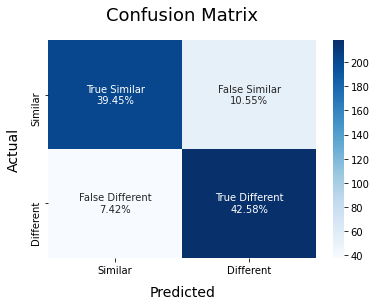

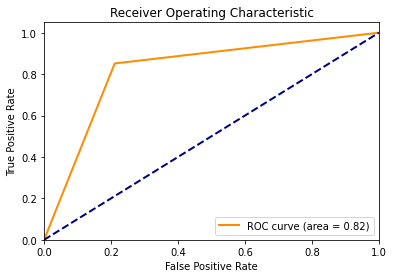

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

def ModelMetrics(pos_probs, neg_probs):
    true = np.array([0] * len(pos_probs) + [1] * len(neg_probs))
    pred_probs = np.append(pos_probs, neg_probs)
    
    # Compute and print the accuracy
    print(f"Accuracy of model: {accuracy_score(true, np.round(pred_probs)):.2%}\n")
    
    # Compute and print precision, recall, and F1 score
    precision = precision_score(true, np.round(pred_probs))
    recall = recall_score(true, np.round(pred_probs))
    f1 = f1_score(true, np.round(pred_probs))
    
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1 Score: {f1:.2%}\n")
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(true, np.round(pred_probs))

    categories  = ['Similar', 'Different']
    names = ['True Similar', 'False Similar', 'False Different', 'True Different']
    percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)

    plt.xlabel("Predicted", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(true, pred_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

pos_probs = np.array([])
neg_probs = np.array([])

for data in get_batch(test_triplet, batch_size=256):
    a, p, n = data
    pos_probs = np.append(pos_probs, classify_images(a, p))
    neg_probs = np.append(neg_probs, classify_images(a, n))
    break

ModelMetrics(pos_probs, neg_probs)


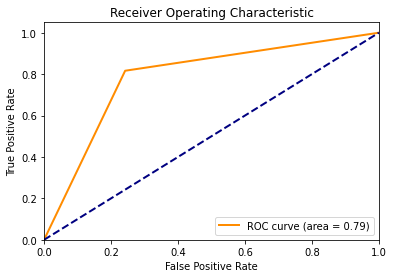

In [68]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Simulated ground truth and predicted probabilities
np.random.seed(42)
true = np.array([0] * len(pos_probs) + [1] * len(neg_probs))
pred_probs = np.append(pos_probs, neg_probs)
 # Simulated predicted probabilities

# Calculate ROC curve
fpr, tpr, _ = roc_curve(true, pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## References

- FaceNet: A Unified Embedding for Face Recognition and Clustering: https://arxiv.org/abs/1503.03832
- Image similarity estimation using a Siamese Network with a triplet loss: https://keras.io/examples/vision/siamese_network/
- Celebrity Face Recognition: https://www.kaggle.com/ravehgillmore/celebrity-face-recognition/
- Face Recognition using Siamese Networks: https://medium.com/wicds/face-recognition-using-siamese-networks-84d6f2e54ea4
